<a href="https://colab.research.google.com/github/habibaelgendy/Thesis/blob/main/Habiba_Copy_of_random_forest_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/habibaelgendy/Thesis/main/Updated%20responses%20-%20Copy.csv')

df.head()

<ipython-input-130-dadf6e4726b0>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,Timestamp,Age,Gender,Nationality,High_School_System,High_School_Grade,Economic_Status,Scholarship,Attendance,Failed_Courses,...,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards,University_System
0,3/26/2023 17:46,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,Yes,>60%,0,...,4,Yes,Yes,No,4,5,3,3,4,NaN
1,3/26/2023 17:48,18-24 years old,Female,Egyptian,IGCSE,65%-69%,High,No,>40%,0,...,3,No,Yes,No,3,3,3,3,3,NaN
2,3/27/2023 19:05,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,No,>80%,0,...,2,Yes,No,No,5,5,5,2,5,NaN
3,3/27/2023 19:06,18-24 years old,Female,egyptian,IGCSE,90%-100%,Medium,No,>80%,3,...,4,No,Yes,No,4,4,5,1,4,NaN
4,3/27/2023 19:07,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,No,>80%,0,...,4,Yes,Yes,Yes,5,5,2,2,4,NaN


In [131]:
#Dropping columns
df = df.drop("Timestamp", axis='columns')
df = df.drop("GPA", axis='columns')
df = df.drop("Rank", axis='columns')
df = df.drop("University_System", axis='columns')
df

,Age,Gender,Nationality,High_School_System,High_School_Grade,Economic_Status,Scholarship,Attendance,Failed_Courses,Grade,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,Yes,>60%,0,A+,...,Yes,4,Yes,Yes,No,4,5,3,3,4
1,18-24 years old,Female,Egyptian,IGCSE,65%-69%,High,No,>40%,0,A+,...,Yes,3,No,Yes,No,3,3,3,3,3
2,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,No,>80%,0,B+,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24 years old,Female,egyptian,IGCSE,90%-100%,Medium,No,>80%,3,B-,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,No,>80%,0,A,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,Yes,> 80%,1,B,...,Yes,3,Yes,Yes,Yes,4,4,4,4,5
184,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,Yes,> 80%,0,A,...,Yes,4,No,Yes,No,5,4,1,1,3
185,18-24 years old,Female,Egyptian/ Japanese,IGCSE,90%-100%,Medium,No,> 80%,0,B-,...,Yes,4,No,No,No,4,3,4,1,4
186,18-24 years old,Male,Egyptian,Thanaweya Amma,90%-100%,Medium,No,> 80%,0,A-,...,Yes,5,Yes,Yes,No,5,4,2,2,4


In [132]:
#Knowing the number of unique values and what are they in the columns.
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

df

Age: Number of unique values 4
Gender : Number of unique values 2
Nationality: Number of unique values 13
High_School_System: Number of unique values 10
High_School_Grade: Number of unique values 5
Economic_Status: Number of unique values 2
Scholarship: Number of unique values 2
Attendance: Number of unique values 6
Failed_Courses: Number of unique values 14
Grade: Number of unique values 10
Extroversion: Number of unique values 5
Calmness: Number of unique values 5
Failure_Tolerance: Number of unique values 5
Self_Confidence: Number of unique values 5
Procrastination: Number of unique values 5
Self_Motivation : Number of unique values 5
Peer_Pressure: Number of unique values 5
Group_Study: Number of unique values 2
Peer_Support: Number of unique values 2
Teacher_Support: Number of unique values 2
Teacher_Closeness: Number of unique values 5
School_Belongingness: Number of unique values 2
Teacher_Knowledge: Number of unique values 5
Teacher_Self_Motivation: Number of unique values 2
Te

,Age,Gender,Nationality,High_School_System,High_School_Grade,Economic_Status,Scholarship,Attendance,Failed_Courses,Grade,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,Yes,>60%,0,A+,...,Yes,4,Yes,Yes,No,4,5,3,3,4
1,18-24 years old,Female,Egyptian,IGCSE,65%-69%,High,No,>40%,0,A+,...,Yes,3,No,Yes,No,3,3,3,3,3
2,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,No,>80%,0,B+,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24 years old,Female,egyptian,IGCSE,90%-100%,Medium,No,>80%,3,B-,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,No,>80%,0,A,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,Yes,> 80%,1,B,...,Yes,3,Yes,Yes,Yes,4,4,4,4,5
184,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,Yes,> 80%,0,A,...,Yes,4,No,Yes,No,5,4,1,1,3
185,18-24 years old,Female,Egyptian/ Japanese,IGCSE,90%-100%,Medium,No,> 80%,0,B-,...,Yes,4,No,No,No,4,3,4,1,4
186,18-24 years old,Male,Egyptian,Thanaweya Amma,90%-100%,Medium,No,> 80%,0,A-,...,Yes,5,Yes,Yes,No,5,4,2,2,4


In [133]:
#Replacing the values

df['Attendance'] = df['Attendance'].str.replace('>','')
df['Attendance'] = df['Attendance'].str.replace('%','').astype(float)
df['Attendance'] = (df['Attendance'] / 100).round(2)
df['High_School_System'] = df['High_School_System'].str.replace('French Baccalaureate','French Baccalaureat')
df['Nationality']=df['Nationality'].replace(to_replace=["Egyptian ", "egyptian", "Egypt", "egyptian ", "Egyptain ", "Egyption ", "Egypt ", "Egyptian/ Japanese "], value="Egyptian" )
df['Failed_Courses']=df['Failed_Courses'].replace(to_replace=["None", "Zero", "none", "None "], value="0" )
df['Failed_Courses']=df['Failed_Courses'].replace(to_replace=["One"], value="1" )
df['High_School_Grade']=df['High_School_Grade'].replace(to_replace=["90%-100%"], value="0.95" )
df['High_School_Grade']=df['High_School_Grade'].replace(to_replace=["65%-69%"], value="0.67" )
df['High_School_Grade']=df['High_School_Grade'].replace(to_replace=["80%-89%"], value="0.845" )
df['High_School_Grade']=df['High_School_Grade'].replace(to_replace=["70%-79%"], value="0.745" )
df['High_School_Grade']=df['High_School_Grade'].replace(to_replace=["under 65%"], value="0.60" )
df['High_School_Grade']=df['High_School_Grade'].astype(float)
df['Failed_Courses']=df['Failed_Courses'].astype(int)
df['Age']=df['Age'].replace(to_replace=["18-24 years old"], value="18-24" )
df['Age']=df['Age'].replace(to_replace=["25-35 years old"], value="25-35" )


df

,Age,Gender,Nationality,High_School_System,High_School_Grade,Economic_Status,Scholarship,Attendance,Failed_Courses,Grade,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24,Female,Egyptian,IGCSE,0.95,Medium,Yes,0.6,0,A+,...,Yes,4,Yes,Yes,No,4,5,3,3,4
1,18-24,Female,Egyptian,IGCSE,0.67,High,No,0.4,0,A+,...,Yes,3,No,Yes,No,3,3,3,3,3
2,18-24,Female,Egyptian,IGCSE,0.95,Medium,No,0.8,0,B+,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24,Female,Egyptian,IGCSE,0.95,Medium,No,0.8,3,B-,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24,Female,Egyptian,IGCSE,0.95,Medium,No,0.8,0,A,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,18-24,Female,Egyptian,IGCSE,0.95,Medium,Yes,0.8,1,B,...,Yes,3,Yes,Yes,Yes,4,4,4,4,5
184,18-24,Female,Egyptian,IGCSE,0.95,Medium,Yes,0.8,0,A,...,Yes,4,No,Yes,No,5,4,1,1,3
185,18-24,Female,Egyptian,IGCSE,0.95,Medium,No,0.8,0,B-,...,Yes,4,No,No,No,4,3,4,1,4
186,18-24,Male,Egyptian,Thanaweya Amma,0.95,Medium,No,0.8,0,A-,...,Yes,5,Yes,Yes,No,5,4,2,2,4


In [134]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      188 non-null    object 
 1   Gender                   188 non-null    object 
 2   Nationality              188 non-null    object 
 3   High_School_System       188 non-null    object 
 4   High_School_Grade        188 non-null    float64
 5   Economic_Status          188 non-null    object 
 6   Scholarship              188 non-null    object 
 7   Attendance               188 non-null    float64
 8   Failed_Courses           188 non-null    int64  
 9   Grade                    182 non-null    object 
 10  Extroversion             188 non-null    int64  
 11  Calmness                 188 non-null    int64  
 12  Failure_Tolerance        188 non-null    int64  
 13  Self_Confidence          188 non-null    int64  
 14  Procrastination          1

In [135]:
df.isnull().sum()

Age                        0
Gender                     0
Nationality                0
High_School_System         0
High_School_Grade          0
Economic_Status            0
Scholarship                0
Attendance                 0
Failed_Courses             0
Grade                      6
Extroversion               0
Calmness                   0
Failure_Tolerance          0
Self_Confidence            0
Procrastination            0
Self_Motivation            0
Peer_Pressure              0
Group_Study                0
Peer_Support               0
Teacher_Support            0
Teacher_Closeness          0
School_Belongingness       0
Teacher_Knowledge          0
Teacher_Self_Motivation    0
Teacher_Self_Confidence    0
Teacher_Openness           0
Fear_Of_Failure            0
Working_Hard               0
Pass_Course                0
Avoiding_Punishment        0
Rewards                    0
dtype: int64

In [136]:
df = df.dropna()

In [137]:
df.isnull().sum()

Age                        0
Gender                     0
Nationality                0
High_School_System         0
High_School_Grade          0
Economic_Status            0
Scholarship                0
Attendance                 0
Failed_Courses             0
Grade                      0
Extroversion               0
Calmness                   0
Failure_Tolerance          0
Self_Confidence            0
Procrastination            0
Self_Motivation            0
Peer_Pressure              0
Group_Study                0
Peer_Support               0
Teacher_Support            0
Teacher_Closeness          0
School_Belongingness       0
Teacher_Knowledge          0
Teacher_Self_Motivation    0
Teacher_Self_Confidence    0
Teacher_Openness           0
Fear_Of_Failure            0
Working_Hard               0
Pass_Course                0
Avoiding_Punishment        0
Rewards                    0
dtype: int64

In [138]:
df['Age'] = pd.Categorical(df['Age'], 
                                      categories=['below 18', '18-24', '25-35', 'above 35'], 
                                      ordered=True)
df['Economic_Status'] = pd.Categorical(df['Economic_Status'], 
                                      categories=['Low', 'Medium', 'High'], 
                                      ordered=True)

<ipython-input-138-62fbe0107c56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.Categorical(df['Age'],
<ipython-input-138-62fbe0107c56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Economic_Status'] = pd.Categorical(df['Economic_Status'],


label encoding

In [139]:
df_encoded = df.copy()
df_encoded['Age'] = df_encoded['Age'].cat.codes
df_encoded['Economic_Status'] = df_encoded['Economic_Status'].cat.codes

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 187
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      182 non-null    int8   
 1   Gender                   182 non-null    object 
 2   Nationality              182 non-null    object 
 3   High_School_System       182 non-null    object 
 4   High_School_Grade        182 non-null    float64
 5   Economic_Status          182 non-null    int8   
 6   Scholarship              182 non-null    object 
 7   Attendance               182 non-null    float64
 8   Failed_Courses           182 non-null    int64  
 9   Grade                    182 non-null    object 
 10  Extroversion             182 non-null    int64  
 11  Calmness                 182 non-null    int64  
 12  Failure_Tolerance        182 non-null    int64  
 13  Self_Confidence          182 non-null    int64  
 14  Procrastination          1

In [140]:
df = df.drop("High_School_System", axis='columns')
df = df.drop("High_School_Grade", axis='columns')
df = df.drop("Economic_Status", axis='columns')
df = df.drop("Scholarship", axis='columns')
df

,Age,Gender,Nationality,Attendance,Failed_Courses,Grade,Extroversion,Calmness,Failure_Tolerance,Self_Confidence,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24,Female,Egyptian,0.6,0,A+,4,4,5,5,...,Yes,4,Yes,Yes,No,4,5,3,3,4
1,18-24,Female,Egyptian,0.4,0,A+,1,2,2,1,...,Yes,3,No,Yes,No,3,3,3,3,3
2,18-24,Female,Egyptian,0.8,0,B+,4,3,2,3,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24,Female,Egyptian,0.8,3,B-,2,5,5,4,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24,Female,Egyptian,0.8,0,A,4,3,2,3,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,18-24,Female,Egyptian,0.8,1,B,4,4,4,3,...,Yes,3,Yes,Yes,Yes,4,4,4,4,5
184,18-24,Female,Egyptian,0.8,0,A,3,2,2,4,...,Yes,4,No,Yes,No,5,4,1,1,3
185,18-24,Female,Egyptian,0.8,0,B-,3,4,4,3,...,Yes,4,No,No,No,4,3,4,1,4
186,18-24,Male,Egyptian,0.8,0,A-,4,3,4,2,...,Yes,5,Yes,Yes,No,5,4,2,2,4


In [141]:
categorical_col.remove('Grade')

In [142]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_col)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 187
Data columns (total 70 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Grade                                            182 non-null    object
 1   Extroversion                                     182 non-null    int64 
 2   Calmness                                         182 non-null    int64 
 3   Failure_Tolerance                                182 non-null    int64 
 4   Self_Confidence                                  182 non-null    int64 
 5   Procrastination                                  182 non-null    int64 
 6   Self_Motivation                                  182 non-null    int64 
 7   Peer_Pressure                                    182 non-null    int64 
 8   Teacher_Closeness                                182 non-null    int64 
 9   Teacher_Knowledge                          

In [143]:
df_encoded.drop(['Gender _Female', 'Economic_Status_2', 'Scholarship_No', 'Group_Study_No', 'Peer_Support_No', 'Teacher_Support_No',
                 'School_Belongingness_No', 'Teacher_Self_Motivation_No', 'Teacher_Self_Confidence_No', 'Teacher_Openness_No'], axis='columns', inplace=True)
df_encoded.columns

Index(['Grade', 'Extroversion', 'Calmness', 'Failure_Tolerance',
       'Self_Confidence', 'Procrastination', 'Self_Motivation ',
       'Peer_Pressure', 'Teacher_Closeness', 'Teacher_Knowledge',
       'Fear_Of_Failure', 'Working_Hard', 'Pass_Course', 'Avoiding_Punishment',
       'Rewards', 'Age_-1', 'Age_1', 'Age_2', 'Age_3', 'Gender _Male',
       'Nationality_Croatian', 'Nationality_Dutch', 'Nationality_Egyptian',
       'Nationality_Indian', 'Nationality_Saudi Arabia ',
       'High_School_System_Abitur', 'High_School_System_American Diploma',
       'High_School_System_French Baccalaureat', 'High_School_System_IB',
       'High_School_System_IGCSE',
       'High_School_System_Internacional Baccalaureate ',
       'High_School_System_SAT',
       'High_School_System_Saudi Arabian curriculum ',
       'High_School_System_Thanaweya Amma', 'High_School_Grade_0.6',
       'High_School_Grade_0.67', 'High_School_Grade_0.745',
       'High_School_Grade_0.845', 'High_School_Grade_0.95',


In [144]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz



In [145]:
# Split the data into features (X) and target (y)
X = df_encoded.drop('Grade', axis=1)
y = df_encoded['Grade']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1891891891891892


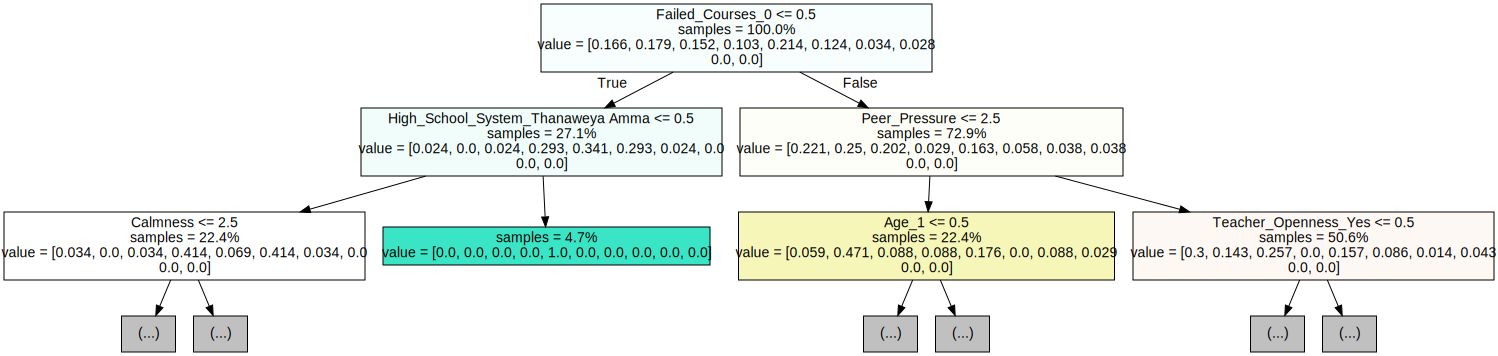

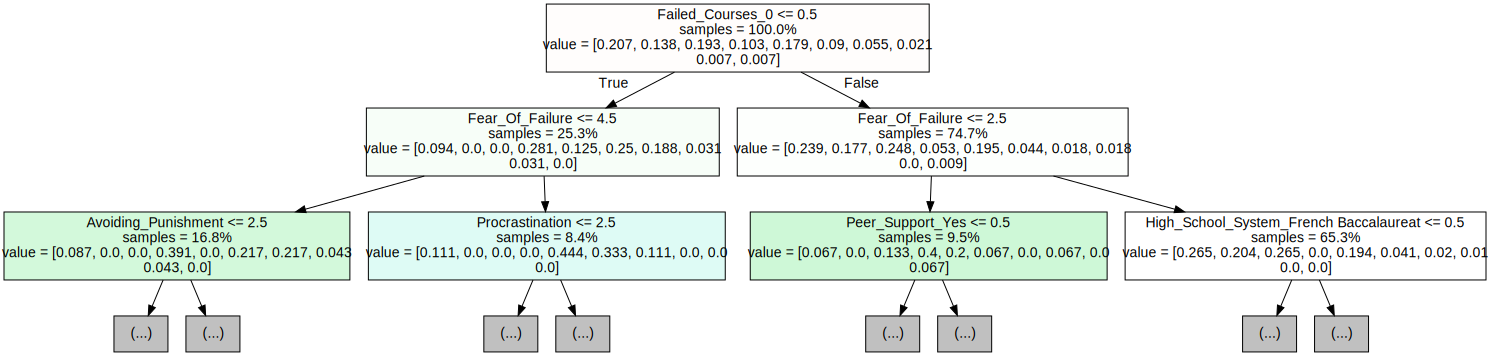

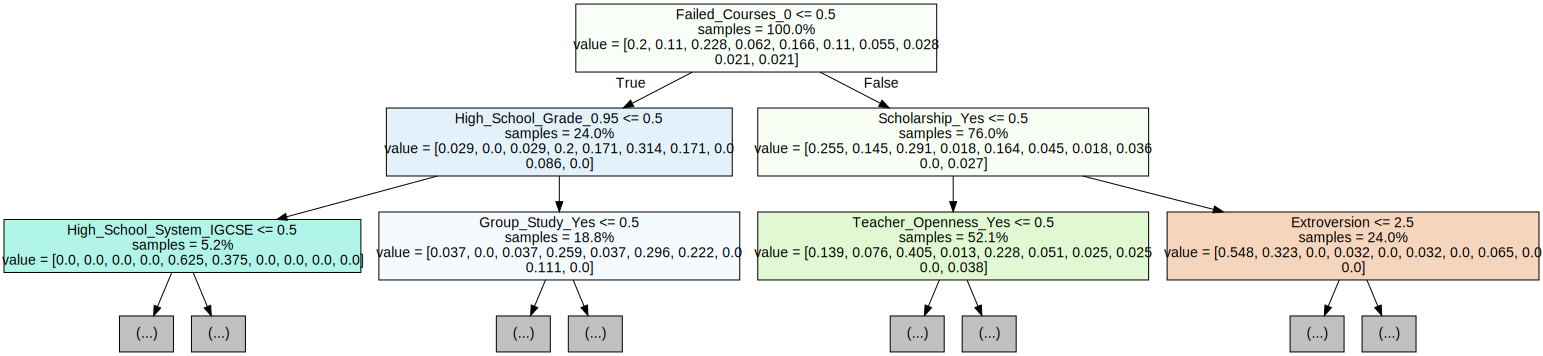

In [146]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)